# Time series analysis and forecast for Total Factor Productivity (TFP) in CAnada, Mexico and USA


---

## TABLE OF CONTENTS

* [Background](#background)
* [Other features](#otherfeatures)
* [1. Data preparation](#dataprep)
* [2. Statistical decomposition](#decomposition)
* [3. Standionarizing series](#std)
* [4. Fitting model and Forecast](#forecast)


---

# BACKGROUND <a class="anchor" id="background"></a>

### Total Factor Productivity (TFP)


Economists have found that they can explain only a portion of economic growth by the growth of inputs to production, such as the number of hours worked or the amount of capital used. The unexplained (or residual) portion, which presumably reflects advances in production technologies and processes, is conventionally attributed to all of the production factors together and is referred to as Total Factor Productivity (TFP) growth.

The measure of TFP is based on 39 variables that measure relative levels of income, output, inputs and productivity for 167 countries between 1950 and 2011.

Even though estimates of TFP provide a measure of many elements of economic progress, they fail to capture large and important historical improvements in well-being, such as leasure time, improvements in life expectancy resulted from technological inventions or even environmental regulations. However, medical advances, by improving labor productivity and extending working lives, may indirectly contribute to growth in measured GDP. The data show little improvement in TFP in health care despite dramatic and continuous improvements in health and despite an average increase in life expectancy at birth of about two and a half years per decade over the past century and a half. 

Productivity growth is often assossiated with new products, tools and processes that reduce costs of estraction and/or transcorming inputs into finished products.

From 90's to 2000's, the TFP showed a global growth trend concentrated in manufacture sactor, and particularly in Information Technology. 

Although forecasters generally project relatively strong continued growth in TFP, theu worry that it'll become increasingly difficult to increase the educational attainment of a labor force when the great majority of workers already have at least a high-school degree and a large portion have attended college. Some observers express further concern that resource constraints (such as rising costs of fossil fuel extraction and changes in climate resulting from the burning of fossil fuels) will require continual innovations and continual increases in expenditures simply to maintain current productivity levels. Much as the key innovations of the late 19th century were not fully exploited until the big wave of TFP growth occurred several decades later, recent innovations in information technology, communications, medicine, and elsewhere may yield substantial growth well into the future. 

**Over the long term, TFP growth is limited only by the ability of innovators to develop new technologies, and that a larger population makes possible a larger pool of talent to be devoted to research, and thus opens up more potential for innovation.**


*Source: [Total Factor Productivity Growth in Historical Perspective](https://www.cbo.gov/sites/default/files/113th-congress-2013-2014/workingpaper/44002_TFP_Growth_03-18-2013_1.pdf) - Robert Shackleton*



# OTHER POSSIBLE FEATURES <a class="anchor" id="otherfeatures"></a>


I recentrly wrote an analysis on which factos more contribute to the perception of happiness around the world based on the The World Happiness Report (https://worldhappiness.report), where the countries are raked according to their score in fields like: 

* Social support of friends and family
* Freedom do make choices in life
* Generosity of the populagion, and 
* Their perception of corruption.

I believe that this kind of report can be a good tool to fill the gab which the Total Factor Productivity has. By implementing more features that picture the human well being as the examples mentioned above.

In addition to the features from The World Happiness Report, I would include more details about health care, such as:
* Medical assistence
* R&D initiatives 
* or even the overall level of physical activity of the population. 


By tacling this gap, we might be able to understant how the 'being' part of the human being correlates with the growth (or even decrease) of the Total Factor of Productivity of each country.

---

# 1. DATA PREPARATION <a class="anchor" id="dataprep"></a>

In [1]:
# LOAD MAIN LIBRARIES

import numpy as np # algebra linear
import pandas as pd ## data processing
import datetime # manipulating date formats

import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
import chart_studio
from chart_studio.plotly import plot_mpl

from statsmodels.tsa.seasonal import seasonal_decompose #decompose
import statsmodels.api as sm #stats

# VISUALIZATION SETTINGS

plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7


In [2]:
!pip install chart_studio

In [46]:
# SETTINGS

import warnings
warnings.filterwarnings("ignore")

In [47]:
# LOAD DATA AND CHECK IT

df = pd.read_csv('TFP.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   isocode  186 non-null    object 
 1   year     186 non-null    int64  
 2   rtfpna   186 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


In [48]:
# RENAME FEATURES FOR BETTER UNDERSTANDING

df.columns=['country', 'year','score']
df=df.dropna() #drop null

# CONVERT year TO A DATE FORMAT

df['year'] = pd.to_datetime(df['year'], yearfirst=True, format='%Y')
df.set_index('year', inplace=True)

df

,country,score
year,,
1950-01-01,USA,0.617148
1951-01-01,USA,0.629588
1952-01-01,USA,0.638451
1953-01-01,USA,0.651858
1954-01-01,USA,0.646179
...,...,...
2007-01-01,MEX,1.013673
2008-01-01,MEX,0.991548
2009-01-01,MEX,0.915879


In [49]:
# DIVIDE DATAFRAME BY COUNTRY

usa = df.loc[df['country'] == 'USA']
can = df.loc[df['country'] == 'CAN']
mex = df.loc[df['country'] == 'MEX']



###  Let's first take a look into the Total Factor Productivity (TFP) for each country over the years.


* **CAN** has remanined quite flat for the whole timeframe;
* **MEX** had a peak in the 70's, but its getting flat as well after a down trend;
* **USA** has been in a uptrend for the whole timeframe;

Text(0, 0.5, 'Score')

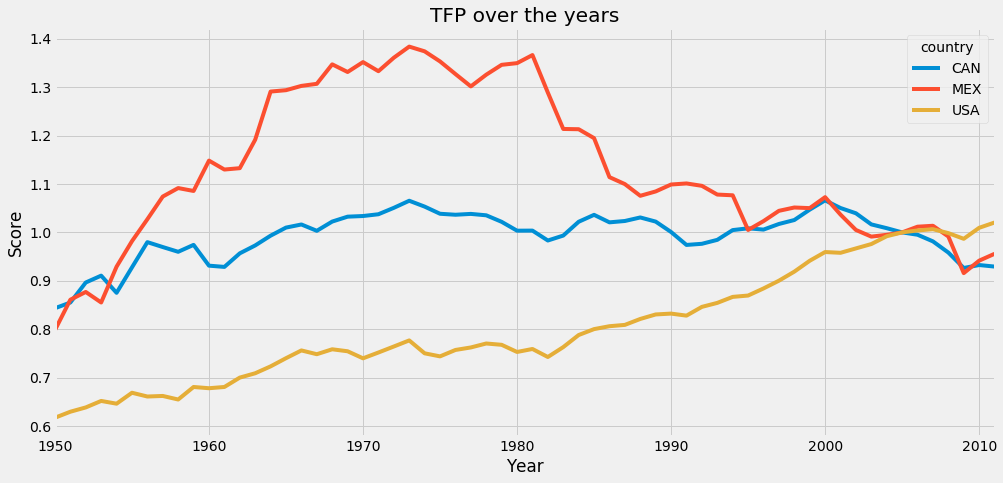

In [50]:
# TIME SERIES FOR TFP

df.pivot_table(index='year',columns='country',values='score',aggfunc='sum').plot()
plt.title('TFP over the years')
plt.xlabel('Year')
plt.ylabel('Score')

Text(0, 0.5, 'Desnity')

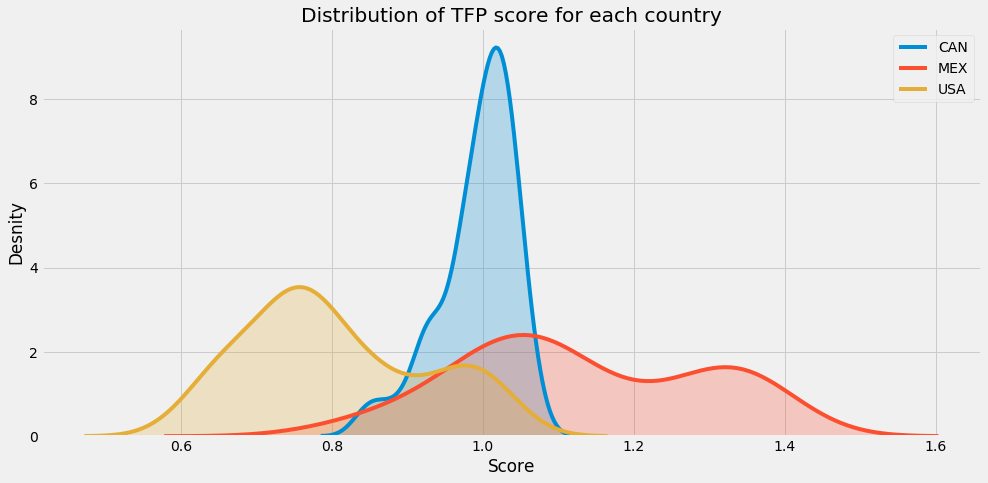

In [51]:
# CHECK FOR THE DISTRIBUTION TFP BY COUNTRY

sns.kdeplot(can.score, shade=True);
sns.kdeplot(mex.score, shade=True);
sns.kdeplot(usa.score, shade=True);
plt.legend(['CAN','MEX','USA']);
plt.title('Distribution of TFP score for each country')
plt.xlabel('Score')
plt.ylabel('Desnity')

---

## 2. STATISTICAL DECOMPOSITION<a class="anchor" id="decomposition"></a>

I'm perfoming a Decomposition of the Time Series for each Country to have a better perspective of:

* Level: the averave value
* Trend: trend how things are overall changing
* Seasonality : how things change within a given period e.g. a year, month, week, day
* Noise: error/residual/irregular activity not explained by the trend or the seasonal value


In an additive time series, the components add together to make the time series. If you have an increasing trend, you still see roughly the same size peaks and troughs throughout the time series. This is often seen in indexed time series where the absolute value is growing but changes stay relative, so I'm going to use this kind of decomposition.

### 2.1 Canada

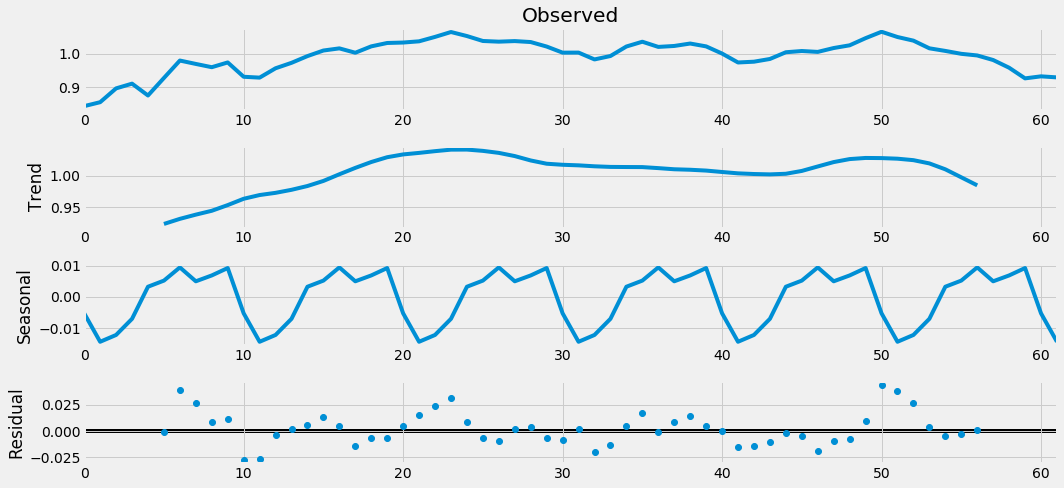

In [52]:
# ADDITIVE DECOMPOSITION PLOT

res = sm.tsa.seasonal_decompose(can.score.values,period=10,model="additive")
fig = res.plot()
fig.show()

### 2.2 Mexico

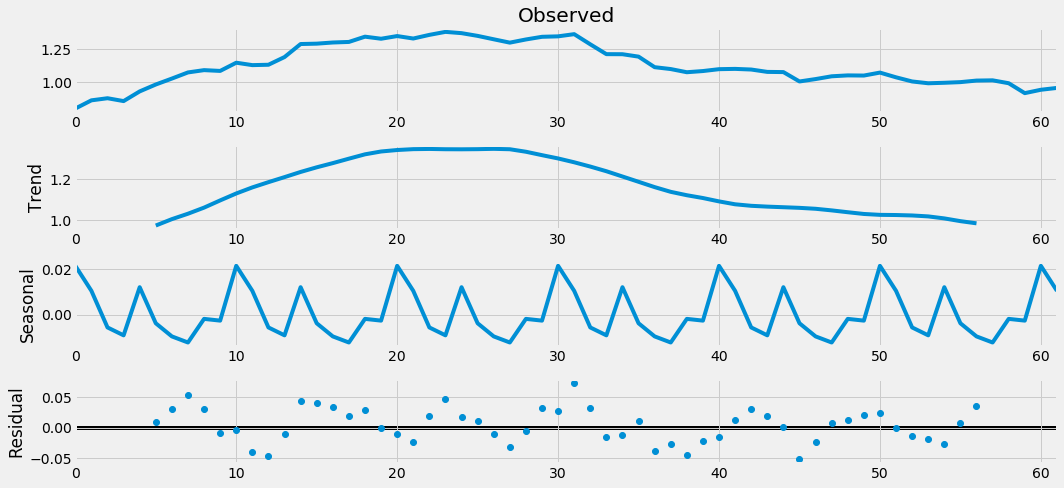

In [53]:
# ADDITIVE DECOMPOSITION PLOT

res = sm.tsa.seasonal_decompose(mex.score.values,freq=10,model="additive")
fig = res.plot()
fig.show()

### 2.3 United States

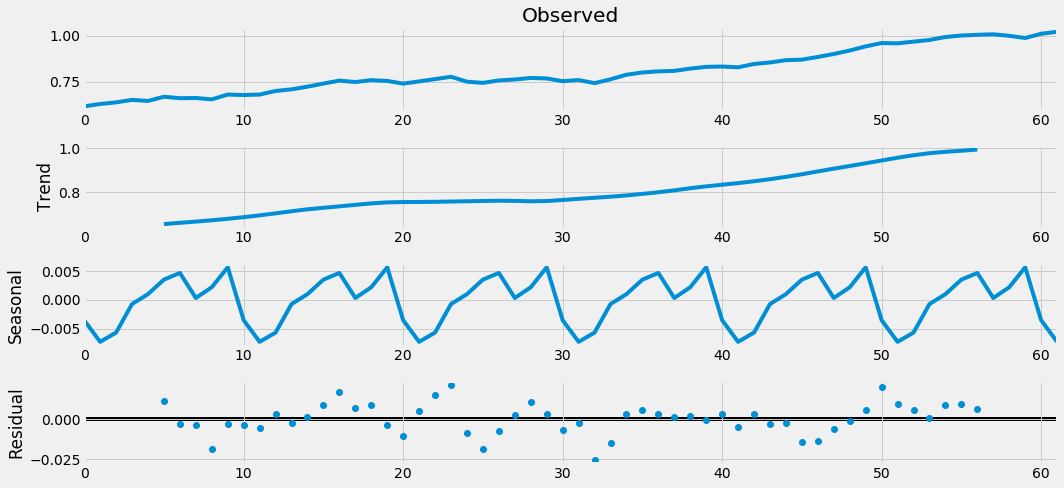

In [54]:
# ADDITIVE DECOMPOSITION PLOT

res = sm.tsa.seasonal_decompose(usa.score.values,freq=10,model="additive")
fig = res.plot()
fig.show()

---

# 3. STANDIONARIZING TIME SERIES<a class="anchor" id="std"></a>


To thave a better perform in the forecasting we have to make the series as more stationary as possible, to do so:

* Check if a series is stationary or not.

**ADF (Augmented Dickey-Fuller) Test**

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help understand if the series is stationary or not. 

**The null and alternate hypothesis**

* Null Hypothesis: The series has a unit root (value of a =1)
* Alternate Hypothesis: The series has no unit root

If fail to reject the null hypothesis, we can say that the series is non-stationary. If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary - that's what I'm looking for.

## 3.1 Stationarity tests    

In [55]:
# SETUP STANDATIONARITY TEST

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(10).mean()
    rolstd = timeseries.rolling(10).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


### 3.1.1 Canada

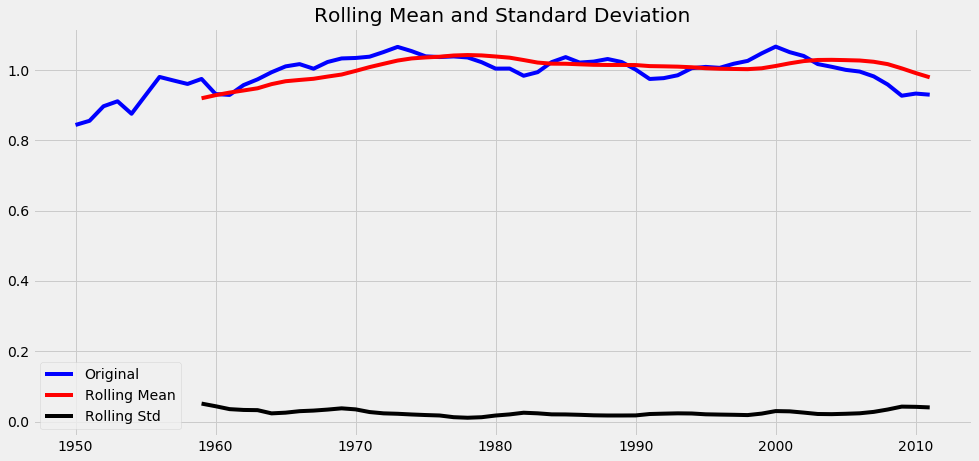

Results of Dickey-Fuller Test:
Test Statistic                 -3.027753
p-value                         0.032383
#Lags Used                      1.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [56]:
 # TEST STATIONARITY FOR CAN USING DICKEY-FULLER TEST
    
test_stationarity(can.score)

### 3.1.2 Mexico

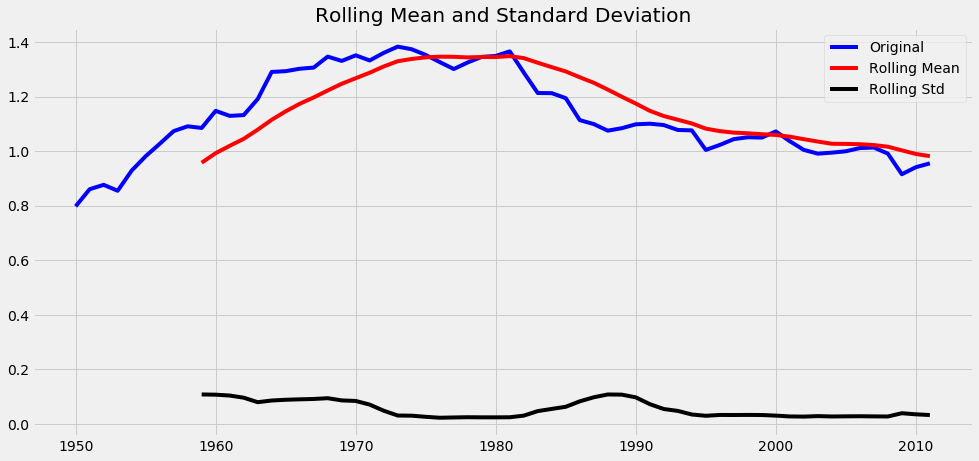

Results of Dickey-Fuller Test:
Test Statistic                 -1.940444
p-value                         0.313281
#Lags Used                      9.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [57]:
# TEST STATIONARITY FOR MEX USING DICKEY-FULLER TEST

test_stationarity(mex.score)

### 3.1.3 United States

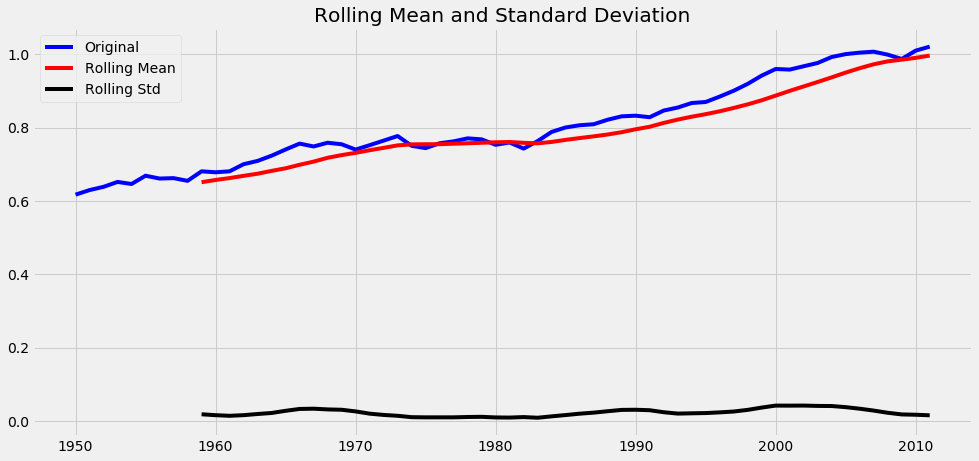

Results of Dickey-Fuller Test:
Test Statistic                  0.223647
p-value                         0.973557
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [58]:
 # TEST STATIONARITY FOR USA USING DICKEY-FULLER TEST

test_stationarity(usa.score)

### 3.1.4 Results

Through the above graphs, for MEX and USA, we can see the variation in mean and standard deviation and hence these series is not stationary. 


We see that the p-value is greater than 0.05 in USA and MEX as well, so we cannot reject the Null hypothesis(The series has a unit root (value of a =1)). Also, the test statistics is greater than the critical values so the data is non-stationary. 

In CAN, the statistics and critical values are quite close, we can assume it is starionary.


## 3.2 Stationarizing  the series

*To get a stationary series, we need to eliminate the trend and seasonality from the series.*

To do so:
* Take a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. 
* Find the rolling average of the series. A rolling average is calculated by taking input for the past 10 years and giving a mean consumption value at every point further ahead in series. (Take the difference of the series and the mean at every point in the series).

This way, we eliminate trends out of a series and obtain a more stationary series.

### 3.2.1 Canada

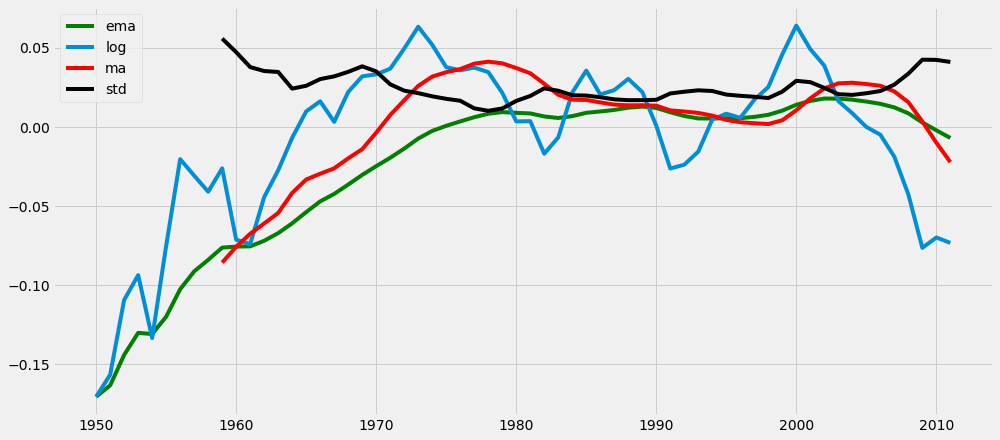

In [59]:
# GET PLOTS OF EMA, LOG, MA, STD 

data = can.score
df_log = np.log(data)

moving_avg = df_log.rolling(10).mean()
std_dev = df_log.rolling(10).std()
weighted_average = df_log.ewm(halflife=10, min_periods=0,adjust=True).mean()

plt.plot(weighted_average, color='green', label='ema')
plt.plot(df_log, label='log')
plt.plot(moving_avg, color="red", label='ma')
plt.plot(std_dev, color ="black", label='std')
plt.legend()
plt.show()

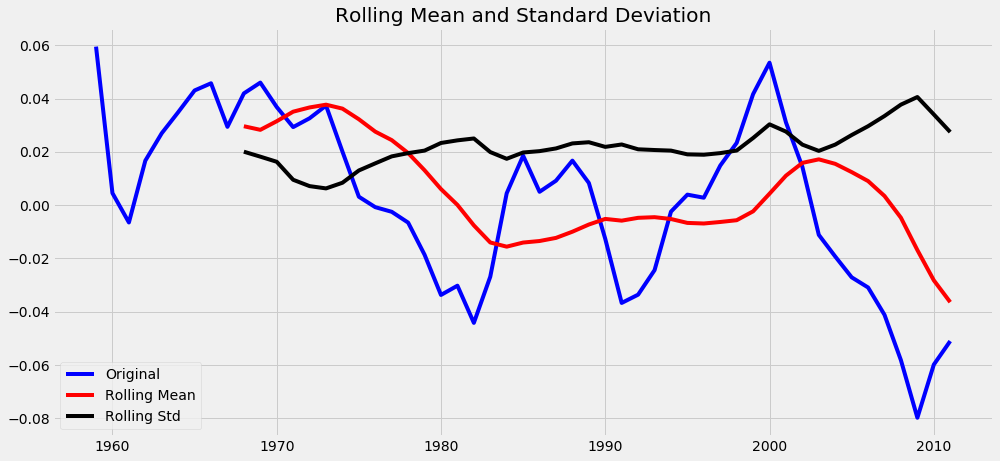

Results of Dickey-Fuller Test:
Test Statistic                 -2.055689
p-value                         0.262701
#Lags Used                      1.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [60]:
#CALCULATE AND PLOT THE DIFFERENCE OF THE SERIES AND IT'S MEAN ON EVERY POINT

df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

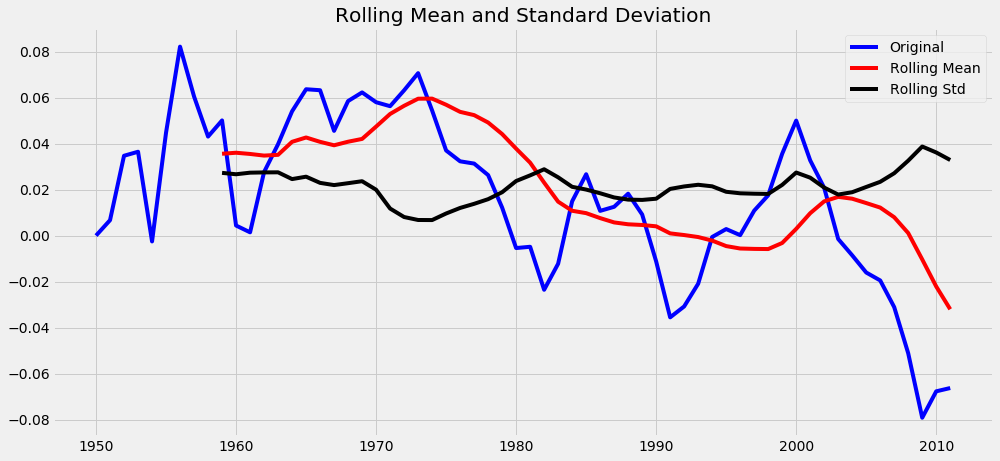

Results of Dickey-Fuller Test:
Test Statistic                 -0.743682
p-value                         0.835108
#Lags Used                      2.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [61]:
# CHECK FOR WHEIGHTED MEAN AND TEST DICKEY-FULLER ON IT

logScale_weightedMean = df_log - weighted_average
test_stationarity(logScale_weightedMean)

**From the above graph, we observed that the data is close to stationarity.**

There can be cases when there is a high seasonality in the data. In those cases, just removing the trend will not help much. We need to also take care of the seasonality in the series. One such method for this task is differencing.

Differencing is a method of transforming a time series dataset. It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

Differencing is performed by subtracting the previous observation from the current observation and perform the Dickey-Fuller test (ADFT) once again.

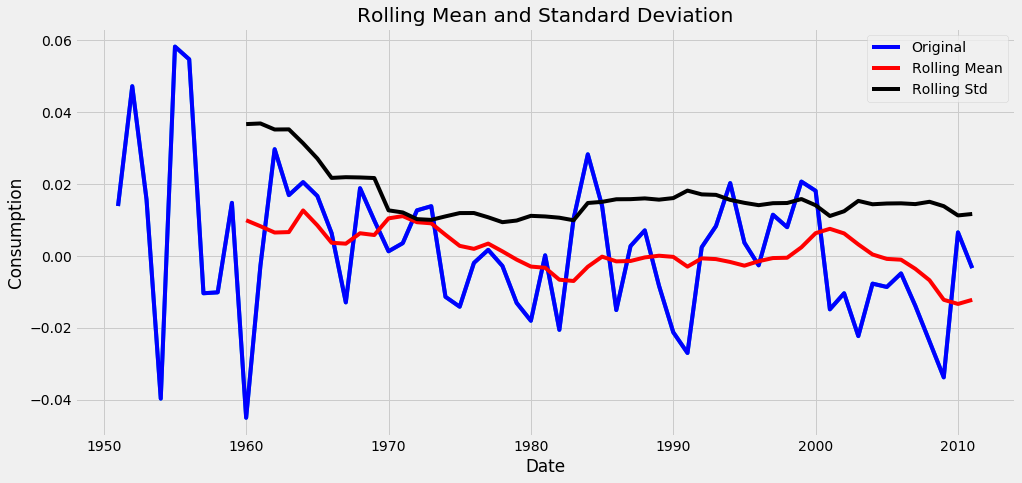

Results of Dickey-Fuller Test:
Test Statistic                -6.178795e+00
p-value                        6.531346e-08
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


In [62]:
# DIFFERENCIACING DATA OF CAN TEST DICKEY-FULLER ON IT

df_log_diff = df_log - df_log.shift()

plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)

df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

### Seccond Decomposition


Perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. 

Finally, perform the Dickey-Fuller test (ADFT) once again.

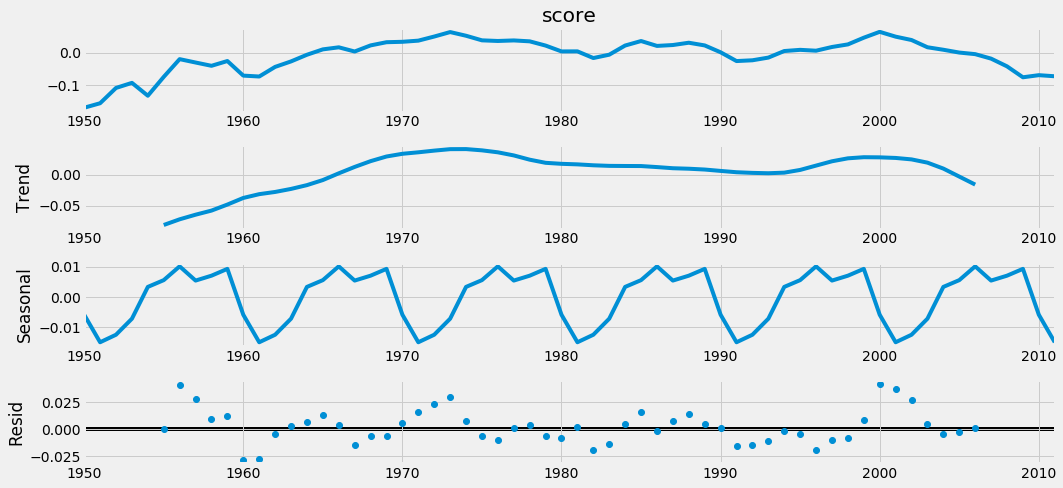

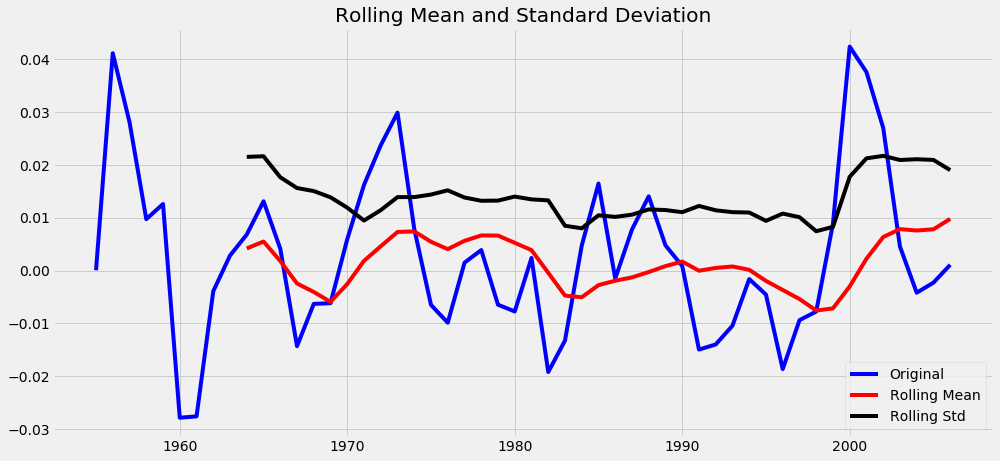

Results of Dickey-Fuller Test:
Test Statistic                 -4.961210
p-value                         0.000026
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [63]:
result = seasonal_decompose(df_log, model='additive', freq = 10)

result.plot()
plt.show()


trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)

### Results for Canada

We can see that the Rolling mean and std are almost parallel to each other, that means we got a stationary series that can be fitted to the model.

**I'll save these results and repeat the proccesses above to analyze MEX and USA**

In [64]:
#SAVING VALIES OF CANADA
can_df_log = df_log
can_df_log_diff = df_log_diff

### 3.2.2 Mexico

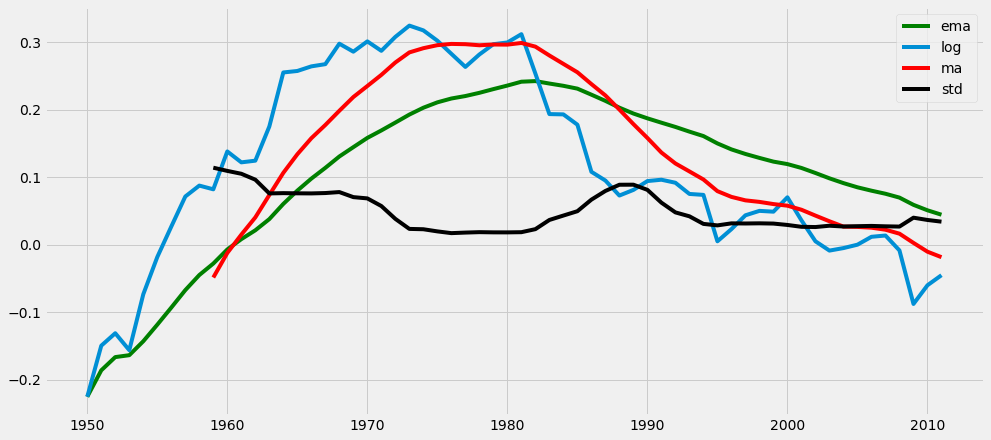

In [65]:
# GET PLOTS OF EMA, LOG, MA, STD 

data = mex.score
df_log = np.log(data)

moving_avg = df_log.rolling(10).mean()
std_dev = df_log.rolling(10).std()
weighted_average = df_log.ewm(halflife=10, min_periods=0,adjust=True).mean()

plt.plot(weighted_average, color='green', label='ema')
plt.plot(df_log, label='log')
plt.plot(moving_avg, color="red", label='ma')
plt.plot(std_dev, color ="black", label='std')
plt.legend()
plt.show()

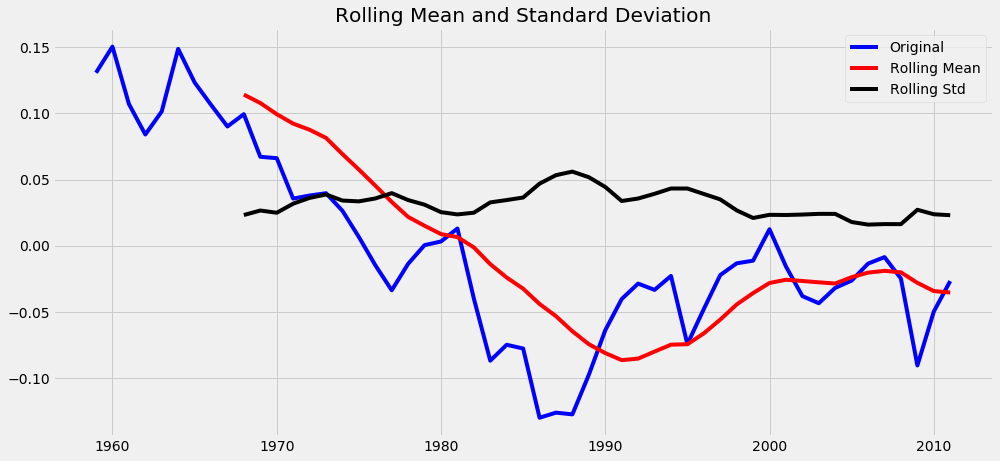

Results of Dickey-Fuller Test:
Test Statistic                 -1.989339
p-value                         0.291267
#Lags Used                      0.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [66]:
#CALCULATE AND PLOT THE DIFFERENCE OF THE SERIES AND IT'S MEAN ON EVERY POINT

df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

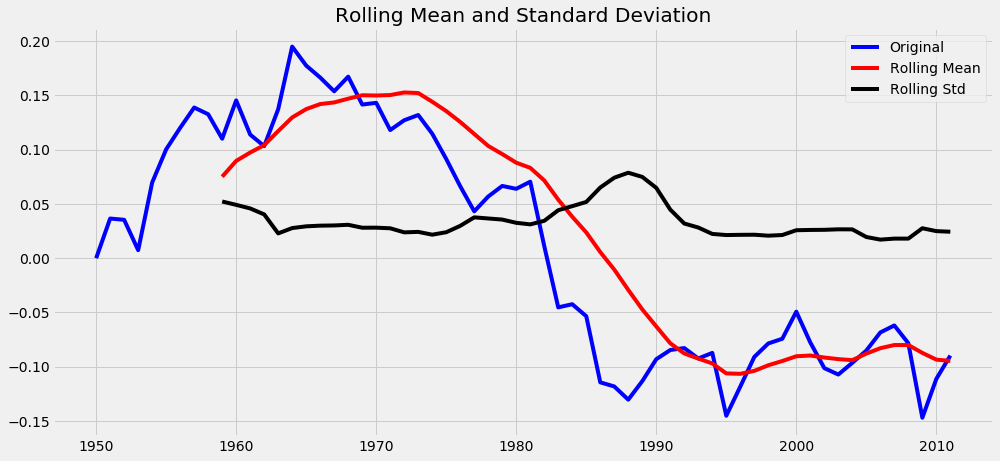

Results of Dickey-Fuller Test:
Test Statistic                 -0.777471
p-value                         0.825651
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [67]:
# CHECK FOR WHEIGHTED MEAN AND TEST DICKEY-FULLER ON IT

logScale_weightedMean = df_log - weighted_average
test_stationarity(logScale_weightedMean)

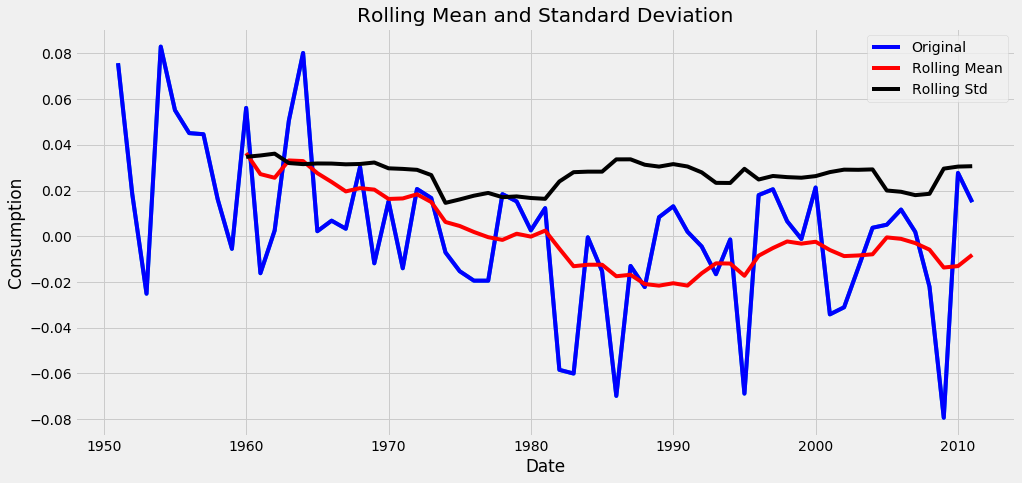

Results of Dickey-Fuller Test:
Test Statistic                -6.156537e+00
p-value                        7.345386e-08
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


In [68]:
# DIFFERENCIACING DATA OF MEX TEST DICKEY-FULLER ON IT

df_log_diff = df_log - df_log.shift()

plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)

df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

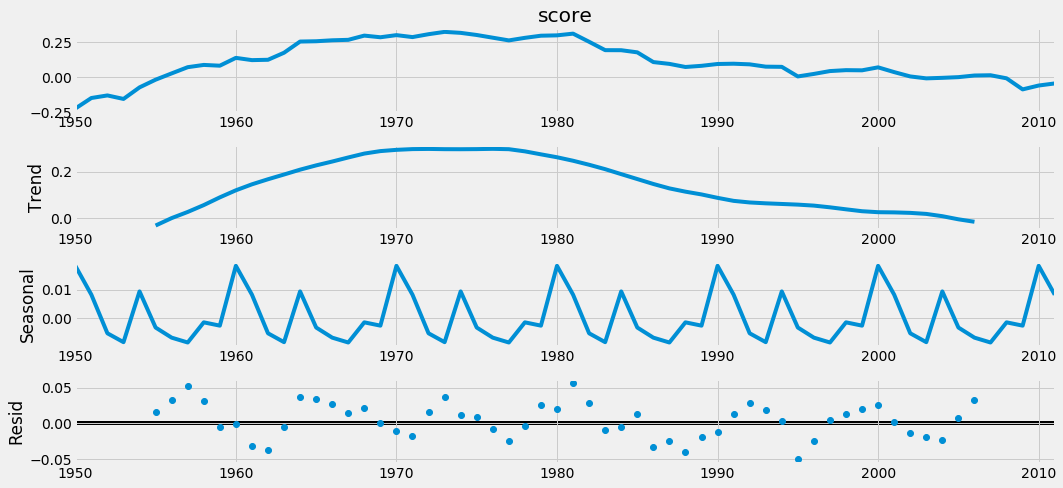

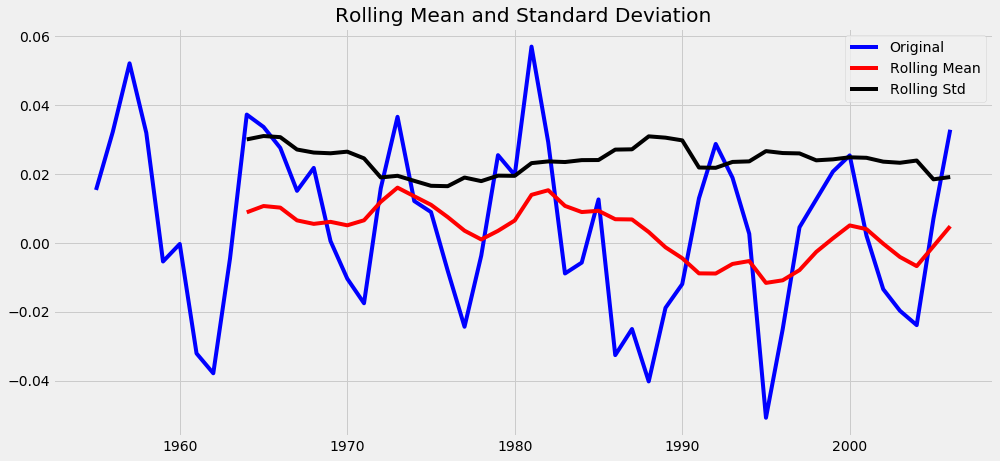

Results of Dickey-Fuller Test:
Test Statistic                 -4.943493
p-value                         0.000029
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [69]:
# SECCOND DECOMPOSITION

result = seasonal_decompose(df_log, model='additive', freq = 10)

result.plot()
plt.show()


trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)

### Results for Mexico

We can see that the Rolling mean and std are almost parallel to each other, that means we got a stationary series that can be fitted to the model.


In [70]:
# SAVING VALIES OF MEXICO
mex_df_log = df_log
mex_df_log_diff = df_log_diff

### 3.2.3 USA

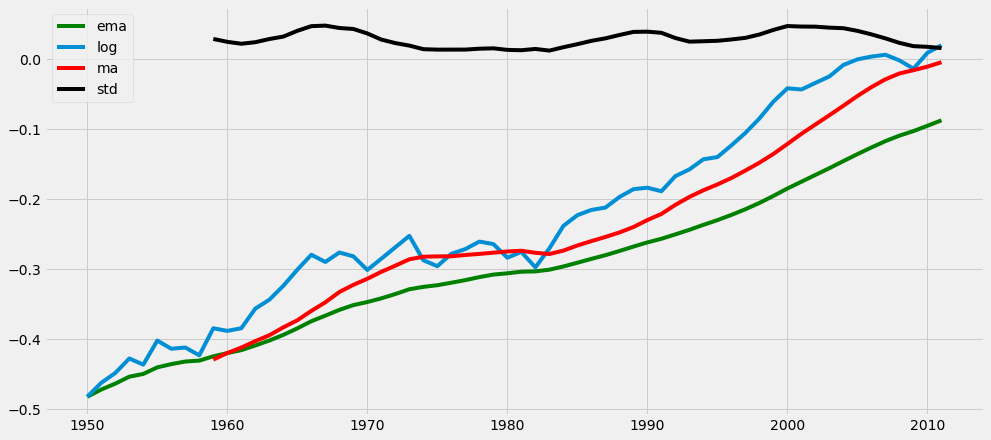

In [71]:
# GET PLOTS OF EMA, LOG, MA, STD 

data = usa.score
df_log = np.log(data)

moving_avg = df_log.rolling(10).mean()
std_dev = df_log.rolling(10).std()
weighted_average = df_log.ewm(halflife=10, min_periods=0,adjust=True).mean()

plt.plot(weighted_average, color='green', label='ema')
plt.plot(df_log, label='log')
plt.plot(moving_avg, color="red", label='ma')
plt.plot(std_dev, color ="black", label='std')
plt.legend()
plt.show()

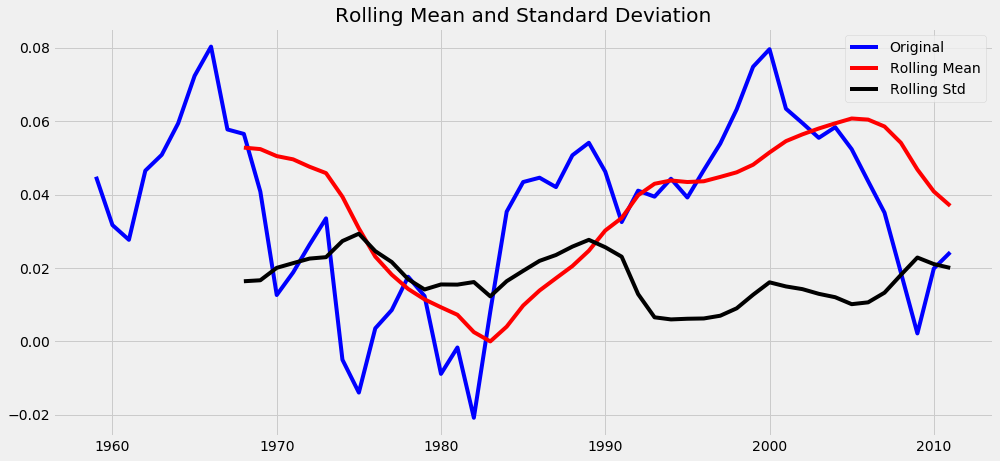

Results of Dickey-Fuller Test:
Test Statistic                 -2.018838
p-value                         0.278375
#Lags Used                      0.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [72]:
#CALCULATE AND PLOT THE DIFFERENCE OF THE SERIES AND IT'S MEAN ON EVERU POINT

df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

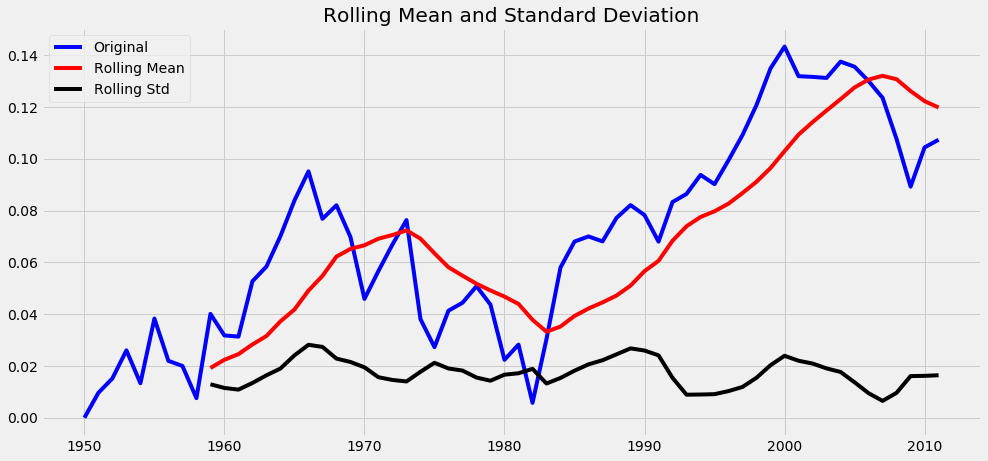

Results of Dickey-Fuller Test:
Test Statistic                 -1.776834
p-value                         0.392022
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [73]:
# CHECK FOR WHEIGHTED MEAN AND TEST DICKEY-FULLER ON IT

logScale_weightedMean = df_log - weighted_average
test_stationarity(logScale_weightedMean)

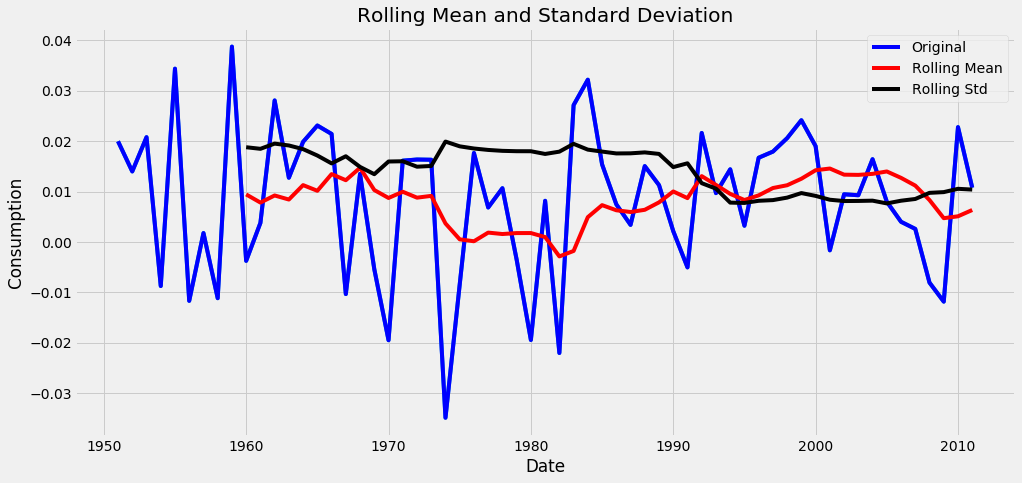

Results of Dickey-Fuller Test:
Test Statistic                -7.874008e+00
p-value                        4.898898e-12
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


In [74]:
# DIFFERENCIACING DATA OF USA TEST DICKEY-FULLER ON IT

df_log_diff = df_log - df_log.shift()

plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)

df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

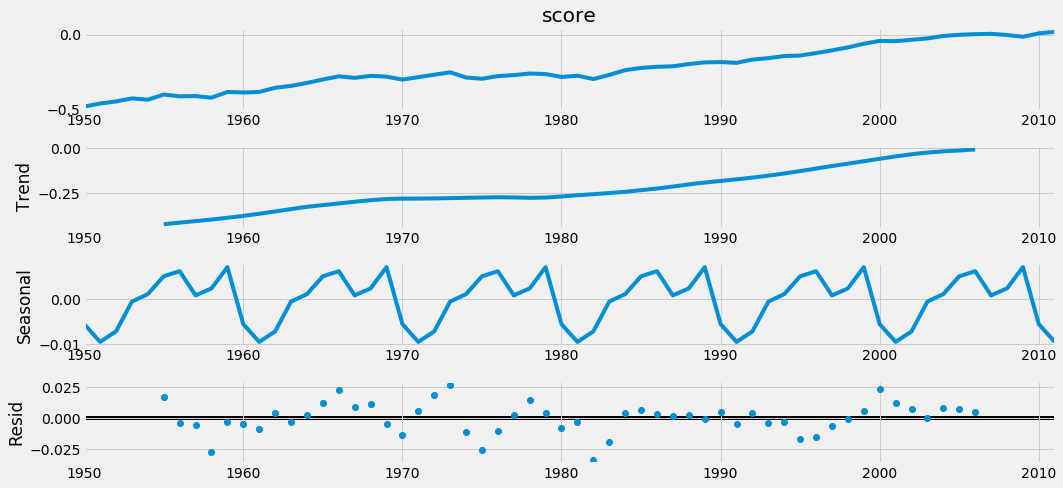

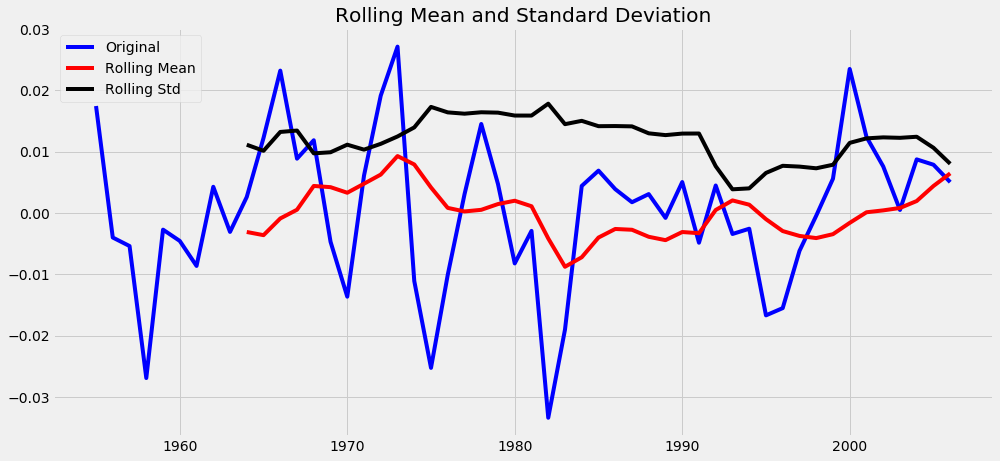

Results of Dickey-Fuller Test:
Test Statistic                 -4.753332
p-value                         0.000067
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [75]:
# SECCOND DECOMPOSITION

result = seasonal_decompose(df_log, model='additive', freq = 10)

result.plot()
plt.show()


trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)

### Results for USA

We can see that the Rolling mean and std are almost parallel to each other, that means we got a stationary series that can be fitted to the model.


In [76]:
#Sving the values to MEX forecast
usa_df_log = df_log
usa_df_log_diff = df_log_diff

---

# 4. FITTING MODEL AND FORECAST<a class="anchor" id="forecast"></a>


### Finding the best parameters for our model


**A nonseasonal ARIMA model is classified as an “ARIMA(p,d,q)” model, where:**

p → Number of autoregressive terms,

d → Number of nonseasonal differences needed for stationarity, and

q → Number of lagged forecast errors in the prediction equation.

Values of p and q come through ACF and PACF plots. 

 

**Autocorrelation Function(ACF)**
 
Statistical correlation summarizes the strength of the relationship between two variables. Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

 

**Partial Autocorrelation Function(PACF)**
 
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for observation and observation at a prior time step is comprised of both the direct correlation and indirect correlations. It is these indirect correlations that the partial autocorrelation function seeks to remove.


### 4.1.1 Canada Correlation

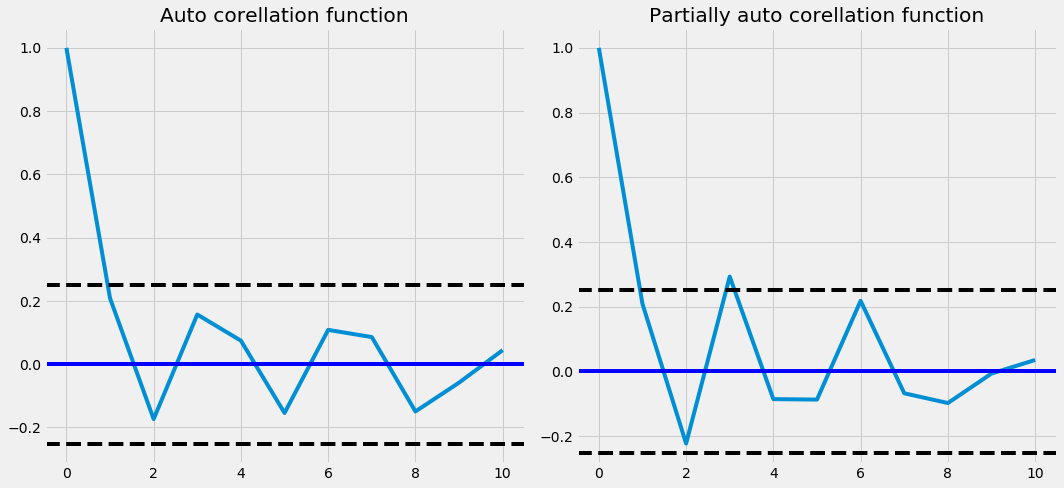

In [77]:
from statsmodels.tsa.stattools import acf,pacf

#Data CAN
df_log_diff = can_df_log_diff
df_log = can_df_log

# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=10)
pacf= pacf(df_log_diff, nlags=10, method='ols')


#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()

#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

RSS : 0.020144


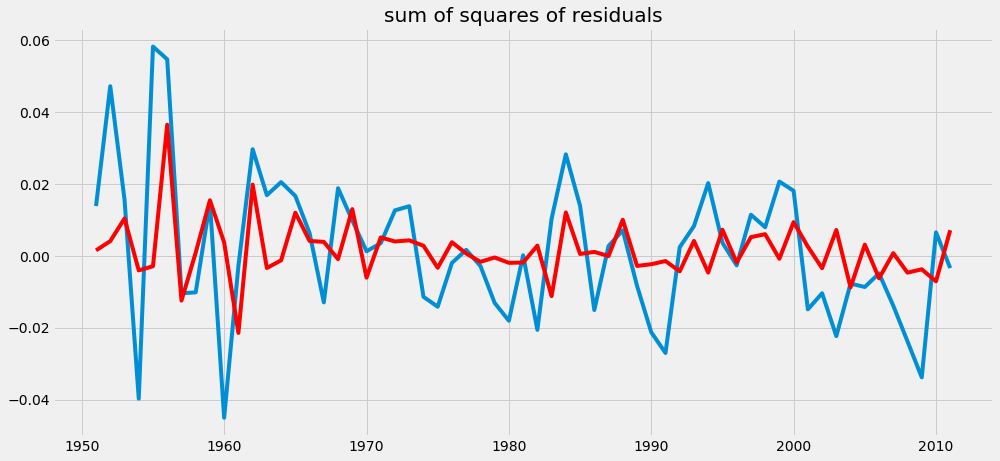

In [84]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_log, order=(3,1,1))
result_AR = model.fit(disp = 0)


plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff.values)**2))

### 4.1.2 Forecast for CAN

Text(0.5, 1.0, 'TFP Forecast for CAN')

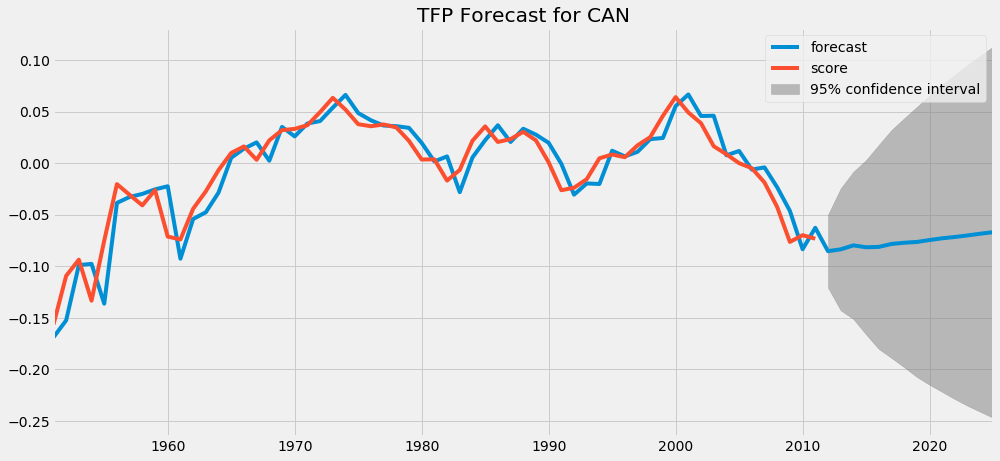

In [85]:
result_AR.plot_predict(1,75)
x=result_AR.forecast(steps=10)
plt.title("TFP Forecast for CAN")

### 4.2.1 Mexico Correlation

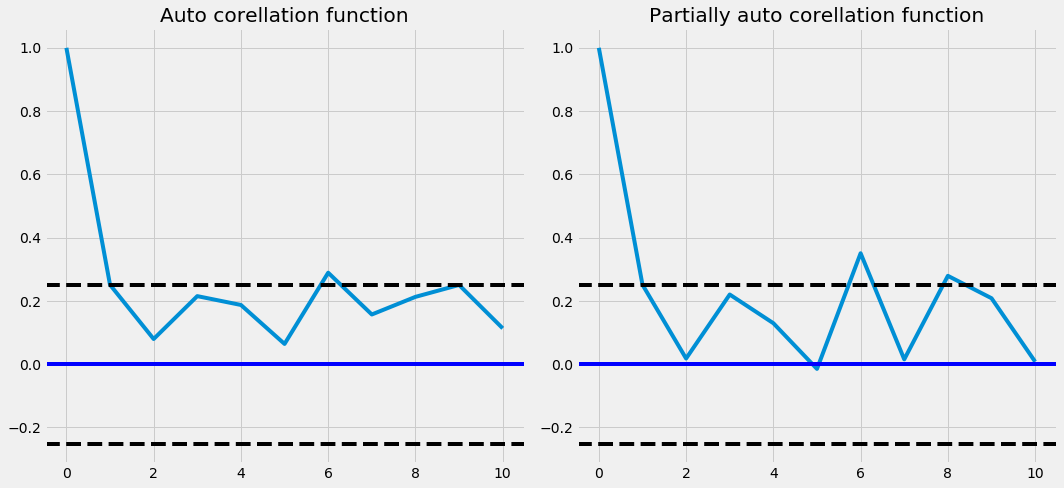

In [86]:
from statsmodels.tsa.stattools import acf,pacf
#Data MEX

df_log_diff = mex_df_log_diff
df_log = mex_df_log

# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=10)
pacf= pacf(df_log_diff, nlags=10, method='ols')


#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()

#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

RSS : 0.056100


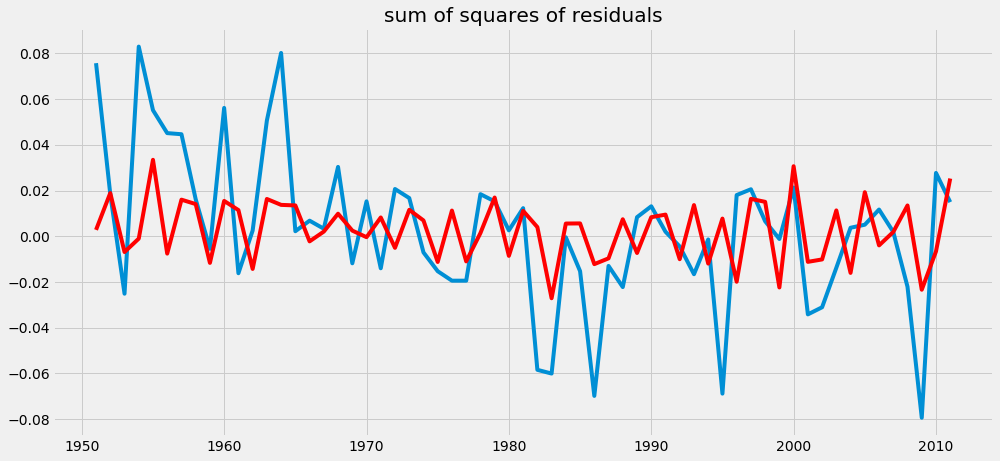

In [87]:
model = ARIMA(df_log, order=(2,1,2))
result_AR = model.fit(disp = 0)


plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff.values)**2))

### 4.2.2 Forecast for MEX

Text(0.5, 1.0, 'TFP Forecast for MEX')

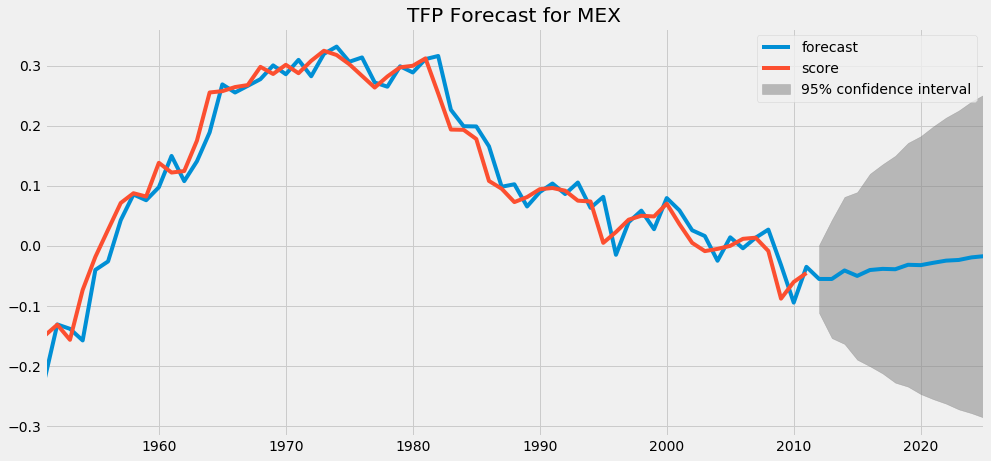

In [88]:
result_AR.plot_predict(1,75)
x=result_AR.forecast(steps=10)
plt.title("TFP Forecast for MEX")

### 4.3.1 USA Correlation

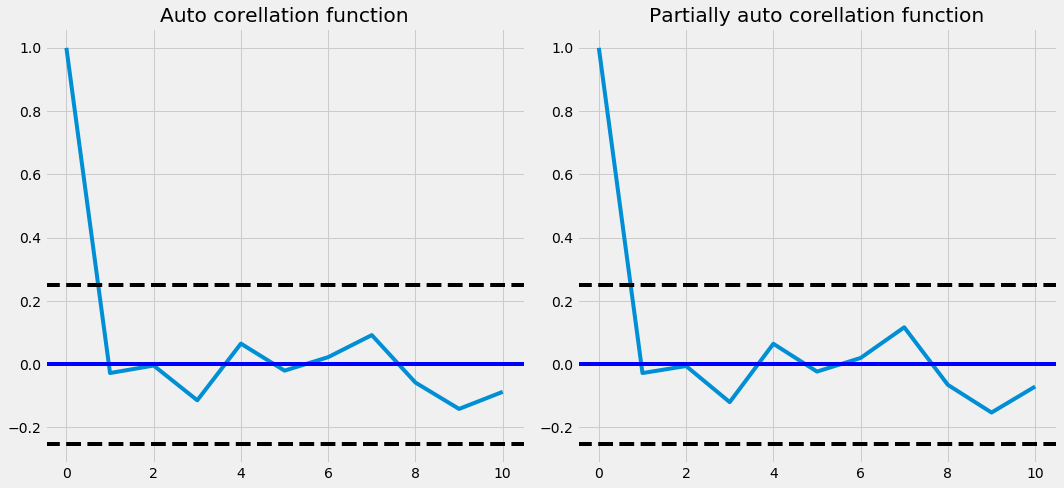

In [89]:
from statsmodels.tsa.stattools import acf,pacf
#Data USA

df_log_diff = usa_df_log_diff
df_log = usa_df_log

# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=10)
pacf= pacf(df_log_diff, nlags=10, method='ols')


#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()

#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

RSS : 0.012793


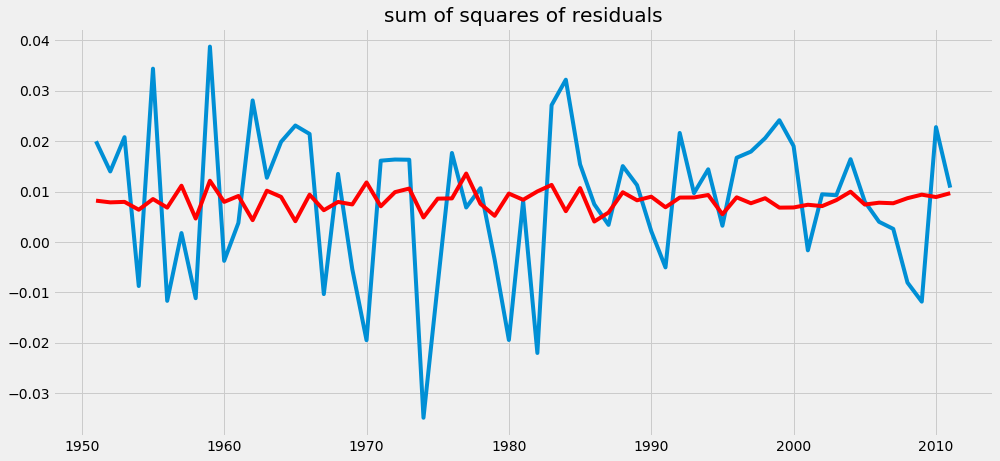

In [90]:

model = ARIMA(df_log, order=(5,1,1))
result_AR = model.fit(disp = 0)


plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff.values)**2))

### 4.3.2 Forecast for USA

Text(0.5, 1.0, 'TFP Forecast for USA')

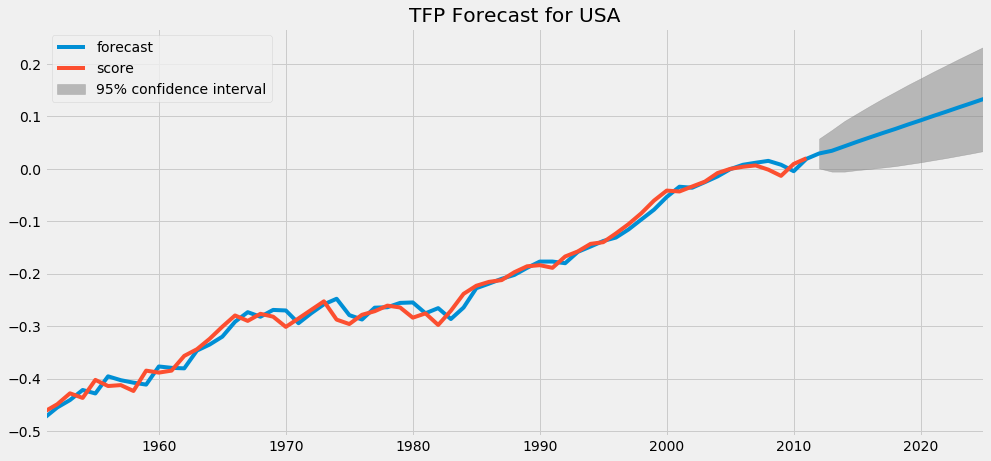

In [92]:
result_AR.plot_predict(1,75)
x=result_AR.forecast(steps=10)
plt.title("TFP Forecast for USA")